### Importing the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Covid-19 dataset 

- The dataset is published by <b>John Hopkins University</b>
- It is from <b>from Jan 22,2020 to June 8,2020</b> 

In [2]:
corona_df = pd.read_csv("C:/Users/ELCOT/Desktop/AI_ML/datasets/covid19_confirmed_global.csv")
corona_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92


In [3]:
corona_df.shape

(266, 143)

### Dropping the Latitude and Logitude columns

In [4]:
corona_df.drop(["Lat","Long"],axis=1,inplace=True)

In [5]:
corona_df.shape      #cross_checking by using the shape property


(266, 141)

266 implies the <b>266 Countries</b> present in the dataset

### Grouping the State and Country Columns

- 

In [6]:
corona_agg_df = corona_df.groupby("Country/Region").sum()

In [7]:
corona_agg_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
Albania,0,0,0,0,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
Algeria,0,0,0,0,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
Andorra,0,0,0,0,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
Angola,0,0,0,0,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92


### Visualizing

Text(0, 0.5, 'People Affected')

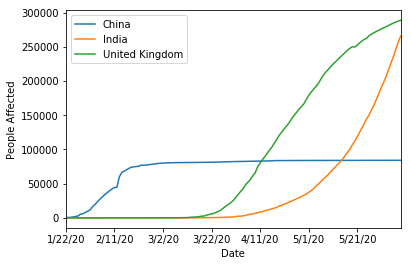

In [8]:
corona_agg_df.loc["China"].plot()
corona_agg_df.loc["India"].plot()
corona_agg_df.loc["United Kingdom"].plot()
plt.legend()
plt.xlabel("Date")
plt.ylabel("People Affected")

### Considering only India

Plotting the <b>First 10 days of infection in India</b>

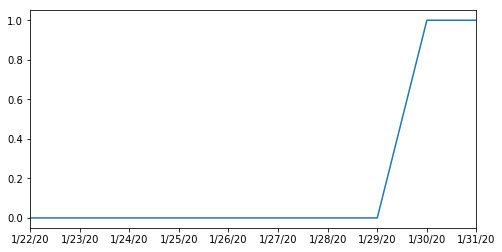

In [9]:
corona_agg_df.loc["India"][:10].plot(figsize=(8,4))

### Plotting the first derivative of the curve

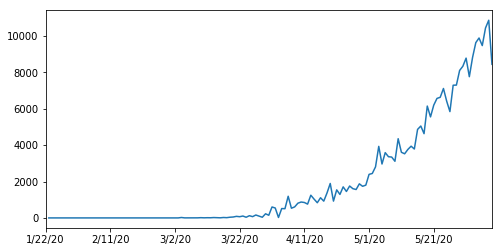

In [10]:
corona_agg_df.loc["India"].diff().plot(figsize=(8,4))

<b>Maximum number of infected cases in One day</b>

In [11]:
print("India - ",corona_agg_df.loc["India"].diff().max())

India -  10864.0


Other Countries:

In [12]:
print("China -",corona_agg_df.loc["China"].diff().max())
print("Italy -",corona_agg_df.loc["Italy"].diff().max())
print("UK -",corona_agg_df.loc["United Kingdom"].diff().max())
print("US -",corona_agg_df.loc["US"].diff().max())

China - 15136.0
Italy - 6557.0
UK - 8733.0
US - 36188.0


### Creating a column called "max_infections" which has the maximum number of infections per day in each country

In [13]:
countries = list(corona_agg_df.index)
max_infections = []
for i in countries:
    max_infections.append(corona_agg_df.loc[i].diff().max())
corona_agg_df["max_infections"] = max_infections 
corona_agg_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,max_infections
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,15205,15750,16509,17267,18054,18969,19551,20342,20917,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,1137,1143,1164,1184,1197,1212,1232,1246,1263,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,9394,9513,9626,9733,9831,9935,10050,10154,10265,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,764,765,844,851,852,852,852,852,852,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,86,86,86,86,86,86,88,91,92,8.0


### Considering only the necessary "max_infections" column

In [14]:
corona_infection = pd.DataFrame(corona_agg_df["max_infections"])
corona_infection.head()

,max_infections
Country/Region,
Afghanistan,915.0
Albania,34.0
Algeria,199.0
Andorra,79.0
Angola,8.0


### Importing World_Hapiness Dataset
*World Happiness Report is published by UN every year.

In [15]:
world_happiness_df = pd.read_csv("C:/Users/Elcot/Desktop/AI_ML/datasets/world_happiness.csv")
world_happiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [16]:
world_happiness_df[world_happiness_df["Country or region"]=="India"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
139,140,India,4.015,0.755,0.765,0.588,0.498,0.2,0.085


#### Dropping the unncessary columns

In [17]:
world_happiness_df.drop(["Score","Perceptions of corruption","Generosity"], axis = 1,inplace = True)

<b>Setting the index as "Country/Region" in order to join both the datasets based on that column</b>

In [18]:
world_happiness_df.rename(columns = {"Country or region":"Country/Region"},inplace = True)

In [19]:
world_happiness_df.set_index("Country/Region",inplace=True)

### Joining both Covid-19 and World Happiness Datasets

In [20]:
print(corona_infection.shape)
print(world_happiness_df.shape)

(188, 1)
(156, 5)


Since the shape is dissimilar join by using inner join

In [21]:
df = corona_infection.join(world_happiness_df,how="inner")
df.head()

,max_infections,Overall rank,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,,,
Afghanistan,915.0,154,0.350,0.517,0.361,0.000
Albania,34.0,107,0.947,0.848,0.874,0.383
Algeria,199.0,88,1.002,1.160,0.785,0.086
Argentina,983.0,47,1.092,1.432,0.881,0.471
Armenia,766.0,116,0.850,1.055,0.815,0.283


In [33]:
df.sort_values(by="max_infections",ascending=False).head()

,max_infections,Overall rank,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,,,
Brazil,33274.0,32,1.004,1.439,0.802,0.390
France,26849.0,24,1.324,1.472,1.045,0.436
China,15136.0,93,1.029,1.125,0.893,0.521
Russia,11656.0,68,1.183,1.452,0.726,0.334
Ecuador,11536.0,50,0.912,1.312,0.868,0.498


### Finding the correlation

In [34]:
df.corr()

,max_infections,Overall rank,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infections,1.000000,-0.222747,0.201773,0.147771,0.209144,0.066970
Overall rank,-0.222747,1.000000,-0.803665,-0.776393,-0.806767,-0.568654
GDP per capita,0.201773,-0.803665,1.000000,0.757521,0.859431,0.394799
Social support,0.147771,-0.776393,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.209144,-0.806767,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.066970,-0.568654,0.394799,0.456317,0.423146,1.000000


#### Visualizing the correlation

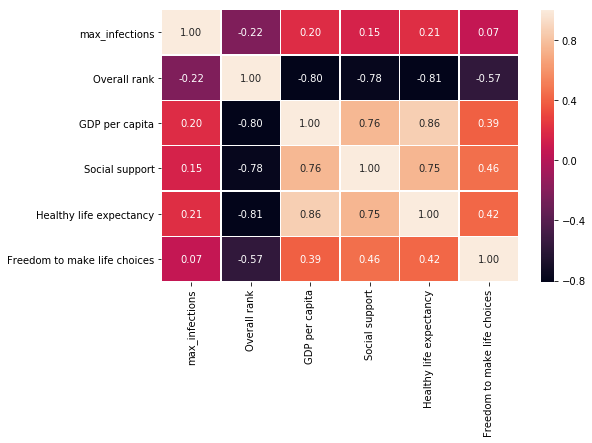

In [37]:
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=.3,ax=ax)

<b>GDP per capita vs max_infections</b>

In [38]:
x=df["GDP per capita"]
y=df["max_infections"]

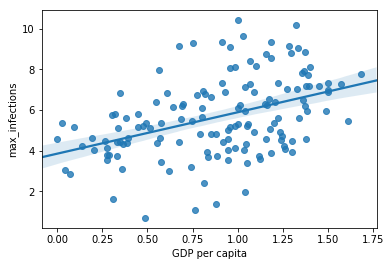

In [46]:
sns.regplot(x,np.log(y),data=df)

<b>Social support vs max_infections

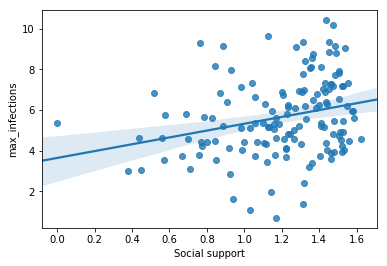

In [47]:
x=df["Social support"]
y=df["max_infections"]
sns.regplot(x,np.log(y))

<b>Healthy life expectancy vs max_infections

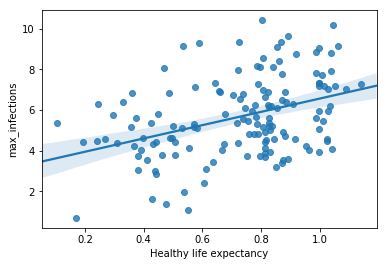

In [48]:
x=df["Healthy life expectancy"]
y=df["max_infections"]
sns.regplot(x,np.log(y))

<b>Freedom to make life choices vs max_infections

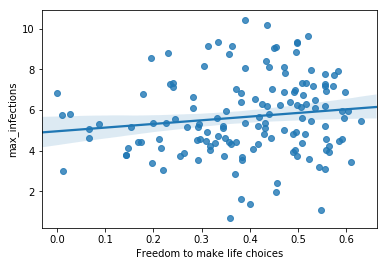

In [49]:
x=df["Freedom to make life choices"]
y=df["max_infections"]
sns.regplot(x,np.log(y))

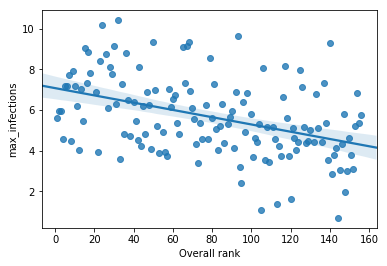

In [50]:
x=df["Overall rank"]
y=df["max_infections"]
sns.regplot(x,np.log(y))

### Result:

- It is found that the <b>OVERALL RANK and MAXIMUM INFECTIONS ARE INVERSELY PROPORTIONAL</b>
   - (i.e) - Developed Countries are more prone to Covid-19 compared to Developing Countries.</b>


- It may be <b>due to the factors such as 
    - less people being tested in the developing countries in comparison to the developed countries
    - lack of kits available in developing countries.</b>
    
 - This can be verified by using the cumulative death rate of each countries due to the COVID-19.